In [109]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [115]:
df=pd.read_csv('data/affairs.csv',encoding='cp949')

In [116]:
df=df.loc[:,['시군구명','읍면동리명','전용면적','거래금액','매수자거래주체정보']]

In [144]:
df=df.loc[df['읍면동리명'].isin(df['읍면동리명'].value_counts()[df['읍면동리명'].value_counts() >= 50].index)]

In [145]:
df.dropna(inplace=True)

In [146]:
df['시군구명'].value_counts()

시군구명
경기도양평군         404
경기도 성남시분당구     359
경기도용인시기흥구      272
경기도성남시분당구      259
경기도평택시         187
경기도시흥시         180
경기도안산시단원구      134
경기도 양평군        121
경기도부천시원미구      117
경기도안양시동안구      114
경기도화성시         109
경기도 안양시만안구     106
경기도고양시일산동구      92
경기도 시흥시         75
경기도 안산시단원구      69
경기도 용인시기흥구      66
경기도남양주시         65
경기도고양시덕양구       59
경기도 화성시         58
경기도 고양시덕양구      51
경기도 안양시동안구      49
경기도수원시팔달구       48
경기도 부천시원미구      44
경기도 하남시         38
경기도파주시          38
경기도 수원시팔달구      36
경기도군포시          35
경기도수원시권선구       35
경기도수원시장안구       31
경기도안양시만안구       31
경기도고양시일산서구      31
경기도 고양시일산동구     31
경기도 고양시일산서구     24
경기도 파주시         24
경기도하남시          22
경기도 남양주시        18
경기도 군포시         15
경기도 수원시장안구       8
경기도여주시           8
경기도 수원시권선구       7
경기도 오산시          7
경기도오산시           7
경기도 평택시          5
Name: count, dtype: int64

In [147]:
df['매수자거래주체정보'].unique()

array(['법인', '개인', '공공기관', '기타'], dtype=object)

In [148]:
df.dropna(inplace=True)

In [149]:
y=df['거래금액']

In [150]:
X=df.drop(columns='거래금액')

In [151]:
y.isna().sum()

0

In [152]:
X.isna().sum()

시군구명         0
읍면동리명        0
전용면적         0
매수자거래주체정보    0
dtype: int64

In [153]:
df.head(2)

,시군구명,읍면동리명,전용면적,거래금액,매수자거래주체정보
2,경기도 성남시분당구,야탑동,10.00,8000,법인
3,경기도 성남시분당구,야탑동,9.72,8000,법인


In [154]:
numerical=['전용면적']

In [155]:
categorical=['시군구명','읍면동리명','매수자거래주체정보']

In [156]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()

In [157]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [158]:
labe_encoder=OrdinalEncoder()
onehot_encoder=OneHotEncoder()

In [159]:
from sklearn.compose import ColumnTransformer

In [160]:
onehot_colums=['시군구명','읍면동리명','매수자거래주체정보']

In [161]:
numeric_columns=['전용면적']

In [162]:
preprocessor=ColumnTransformer([
    ('num',imputer,numeric_columns),
    ('onehot',onehot_encoder,onehot_colums)
])

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
regressor=RandomForestRegressor(random_state=47)

In [165]:
from sklearn.pipeline import Pipeline

In [166]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('modeling',regressor)])

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)

In [194]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['전용면적']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['시군구명', '읍면동리명',
                                                   '매수자거래주체정보'])])),
                ('modeling', RandomForestRegressor(random_state=47))])

In [195]:
y_pred=pipeline.predict(X_test)

In [196]:
from sklearn.metrics import mean_absolute_error,r2_score

In [197]:
mean_absolute_error(y_test,y_pred)

16170.339733370156

In [198]:
r2_score(y_test,y_pred)

0.8041400111484012

In [199]:
df_y=y_test.to_frame()

In [200]:
df_y['pred']=y_pred

In [201]:
df_y

,거래금액,pred
958,8000,8192.777778
8682,3500,3799.937295
4024,11000,8527.500000
7011,25000,16983.650905
168,85000,41198.039524
...,...,...
1743,75000,41509.363333
5919,1220,2000.217132
1429,35200,35195.450000
1542,8000,9980.000000


In [202]:
df_y.reset_index(drop=True,inplace=True)

c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


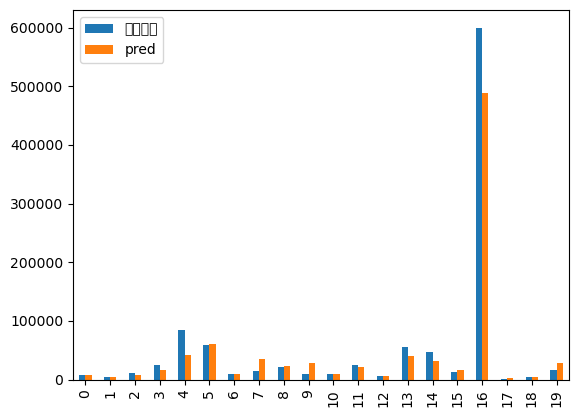

In [203]:
df_y.loc[0:19,:].plot(kind='bar')
plt.show()

In [204]:
df.head(2)

,시군구명,읍면동리명,전용면적,거래금액,매수자거래주체정보
2,경기도 성남시분당구,야탑동,10.00,8000,법인
3,경기도 성남시분당구,야탑동,9.72,8000,법인


In [212]:
import numpy as np
new_data = np.array([['경기도 성남시분당구', '야탑동', 10,'법인']])

In [213]:
new_data_df = pd.DataFrame(new_data, columns=['시군구명','읍면동리명','전용면적','매수자거래주체정보'])

In [214]:
new_data.reshape(1,-1)

array([['경기도 성남시분당구', '야탑동', '10', '법인']], dtype='<U11')

In [215]:
pipeline.predict(new_data_df)

array([8000.])

In [209]:
import joblib

In [210]:
joblib.dump(pipeline,'affairs.pkl')

['affairs.pkl']

In [211]:
df['시군구명'].unique()

array(['경기도 성남시분당구', '경기도 시흥시', '경기도성남시분당구', '경기도 부천시원미구', '경기도 파주시',
       '경기도안양시만안구', '경기도남양주시', '경기도고양시일산동구', '경기도용인시기흥구', '경기도 양평군',
       '경기도화성시', '경기도안산시단원구', '경기도부천시원미구', '경기도군포시', '경기도시흥시',
       '경기도 고양시일산동구', '경기도 남양주시', '경기도수원시장안구', '경기도양평군', '경기도 안양시만안구',
       '경기도안양시동안구', '경기도 화성시', '경기도 고양시덕양구', '경기도수원시팔달구', '경기도 안양시동안구',
       '경기도 수원시팔달구', '경기도 안산시단원구', '경기도고양시일산서구', '경기도 용인시기흥구',
       '경기도 수원시권선구', '경기도 고양시일산서구', '경기도 하남시', '경기도평택시', '경기도 군포시',
       '경기도 수원시장안구', '경기도 오산시', '경기도고양시덕양구', '경기도 평택시', '경기도수원시권선구',
       '경기도파주시', '경기도오산시', '경기도하남시', '경기도여주시'], dtype=object)

In [192]:
df['읍면동리명'].unique()

array(['야탑동', '정왕동', '구미동', '삼평동', '중동', '와동동', '안양동', '다산동', '장항동',
       '옥천면 신복리', '반송동', '원곡동', '산본동', '금곡동', '정자동', '고잔동', '상동', '서현동',
       '호계동', '영천동', '향동동', '관양동', '인계동', '주엽동', '지축동', '풍산동', '평택동',
       '능곡동', '오산동', '서천동'], dtype=object)

In [108]:
df['매수자거래주체정보'].unique()

array(['법인', '개인', '기타', '공공기관'], dtype=object)